# Imports

In [55]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from ecgdetectors import Detectors

# Load matlab .mat file with preprocessed data for the first participant

In [142]:
Data_Preprocessed_P01 = loadmat('Data_Preprocessed_P01.mat')
print(type(Data_Preprocessed_P01))
print(Data_Preprocessed_P01.keys())

<class 'dict'>
dict_keys(['__header__', '__version__', '__globals__', 'VideoIDs', 'joined_data', 'labels_ext_annotation', 'labels_selfassessment'])


In [143]:
# ECG data for the first video of the first participant (15th channel)
ECG1_1_1 = Data_Preprocessed_P01['joined_data'][0][0].T[14]
print(ECG1_1_1)

[-16.64023365 -16.83013826  -8.55812234 ...  10.53246433   8.9273783
   8.42493274]


# Show a part of ECG signal

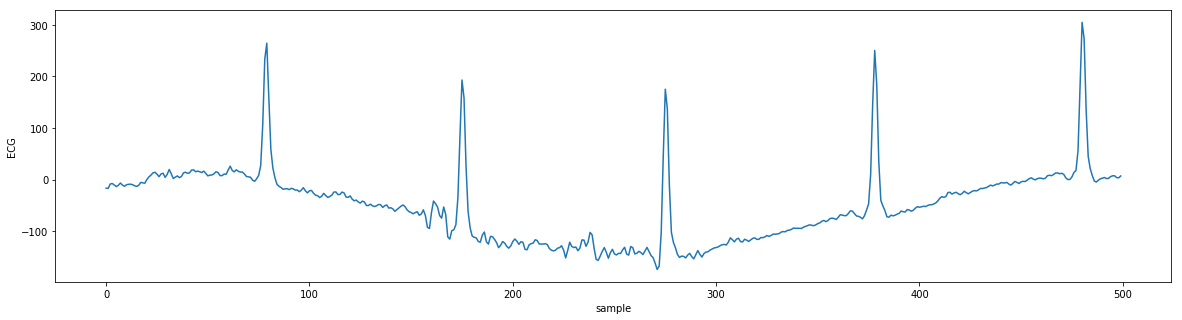

In [144]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(ECG1_1_1[0:500])
plt.xlabel('sample')
plt.ylabel('ECG')
plt.show()

# Pan-Tompkins alogoritm for r_peaks detection

In [160]:
# fs - sampling frequency
fs=128
detectors = Detectors(fs)
r_peaks = detectors.pan_tompkins_detector(ECG1_1_1)

In [161]:
r_peaks = np.asarray(r_peaks)-12
print("Samples with r_peaks:\n", r_peaks)
r_peaks_val = ECG1_1_1[r_peaks]
print("\nNumber of r_peaks: ", len(r_peaks_val))

Samples with r_peaks:
 [   27    79   175   275   378   474   575   671   768   856   943  1029
  1113  1199  1279  1367  1461  1545  1631  1716  1802  1882  1974  2059
  2146  2234  2323  2411  2490  2575  2666  2749  2832  2915  2992  3084
  3171  3256  3344  3433  3522  3599  3697  3781  3858  3946  4027  4103
  4195  4284  4368  4465  4558  4650  4744  4834  4920  5001  5094  5181
  5267  5344  5438  5527  5609  5700  5798  5887  5974  6054  6139  6230
  6315  6397  6482  6567  6651  6736  6812  6901  6976  7056  7143  7224
  7306  7388  7468  7543  7629  7707  7778  7865  7950  8030  8122  8200
  8283  8370  8449  8528  8608  8689  8775  8864  8949  9048  9139  9231
  9323  9415  9503  9595  9676  9782  9876  9960 10048 10141 10220 10311
 10394 10478 10561 10637 10724 10810 10896 10983 11065 11151 11237 11325
 11413 11496 11590 11676 11761 11839 11929 12006 12094 12177]

Number of r_peaks:  142


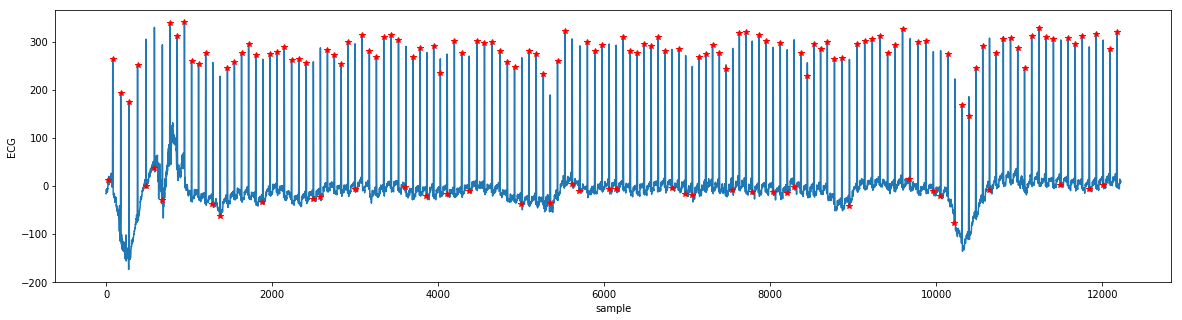

In [155]:
plt.plot(ECG1_1_1)
plt.plot(r_peaks, r_peaks_val, 'r*')
plt.xlabel('sample')
plt.ylabel('ECG')
plt.show()

# HRV analysis to determine the beat to beat interval (RR interval)

In [156]:
HRV = [j-i for i, j in zip(r_peaks, r_peaks[1:])]
print(HRV)
print(len(HRV))

[52, 96, 100, 103, 96, 101, 96, 97, 88, 87, 86, 84, 86, 80, 88, 94, 84, 86, 85, 86, 80, 92, 85, 87, 88, 89, 88, 79, 85, 91, 83, 83, 83, 77, 92, 87, 85, 88, 89, 89, 77, 98, 84, 77, 88, 81, 76, 92, 89, 84, 97, 93, 92, 94, 90, 86, 81, 93, 87, 86, 77, 94, 89, 82, 91, 98, 89, 87, 80, 85, 91, 85, 82, 85, 85, 84, 85, 76, 89, 75, 80, 87, 81, 82, 82, 80, 75, 86, 78, 71, 87, 85, 80, 92, 78, 83, 87, 79, 79, 80, 81, 86, 89, 85, 99, 91, 92, 92, 92, 88, 92, 81, 106, 94, 84, 88, 93, 79, 91, 83, 84, 83, 76, 87, 86, 86, 87, 82, 86, 86, 88, 88, 83, 94, 86, 85, 78, 90, 77, 88, 83]
141
